Binary Bandit

Matplotlib created a temporary cache directory at C:\Users\Lenovo\AppData\Local\Temp\matplotlib-_yuxoy57 because the default path (C:\Users\Lenovo\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


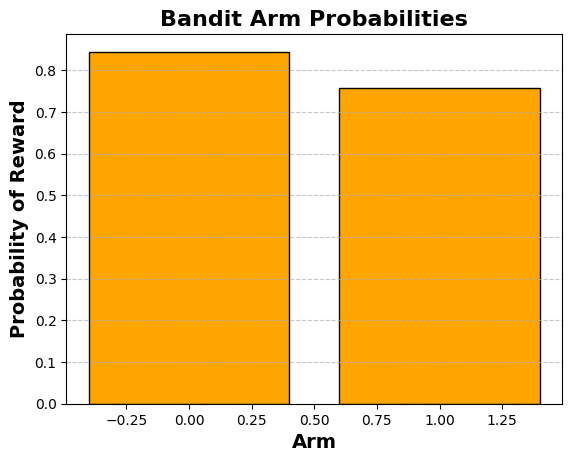

In [3]:
import random
import matplotlib.pyplot as plt
random.seed(0)


class BinaryBandit(object):
    p = [0] * 2
    
    def __init__(self):
        self.N = 2
        for i in range(0, self.N):
            self.p[i] = random.random()
            
    def actions(self):
        result = []
        for i in range(0, self.N):
            result.append(i)
        return result
    
    def reward(self, action):
        rand = random.random()
        if rand < self.p[action]:
            return 1
        else:
            return 0
        
bandit = BinaryBandit()
actions = bandit.actions()


rewards = [bandit.reward(action) for action in actions]


plt.bar(actions, bandit.p, color='orange', edgecolor='black')


plt.xlabel('Arm', fontsize=14, fontweight='bold')
plt.ylabel('Probability of Reward', fontsize=14, fontweight='bold')
plt.title('Bandit Arm Probabilities', fontsize=16, fontweight='bold')


plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()



In [4]:
import random
import matplotlib.pyplot as plt

def eGreedy_binary(myBandit, epsilon, max_iteration):
  
    Q = [0] * myBandit.N  
    count = [0] * myBandit.N  
    r = 0  
    R = [] 
    R_avg = [0] 
    
    
    for iter in range(1, max_iteration + 1):
        if random.random() > epsilon:
            action = Q.index(max(Q)) 
        else:
            action = random.choice(myBandit.actions()) 
        
        r = myBandit.reward(action) 
        R.append(r)  
        
        count[action] += 1
        
      
        Q[action] += (r - Q[action]) / count[action]
        
       
        R_avg.append(R_avg[iter-1] + (r - R_avg[iter-1]) / iter)
        
      
        if iter == max_iteration:
            print(f"Final Counts for Action 1 (Arm 1): {count[0]}")
            print(f"Final Counts for Action 2 (Arm 2): {count[1]}")
            
            action_labels = ["Action 1", "Action 2"]
            
           
            plt.bar(action_labels, count, color=['blue', 'green'], edgecolor='black')
            
         
            plt.title("Number of Times Each Action was Taken", fontsize=14, fontweight='bold')
            plt.xlabel("Action", fontsize=12)
            plt.ylabel("Count", fontsize=12)
            
           
            plt.show()
    
   
    return Q, R_avg, R


Final Counts for Action 1 (Arm 1): 113
Final Counts for Action 2 (Arm 2): 1887


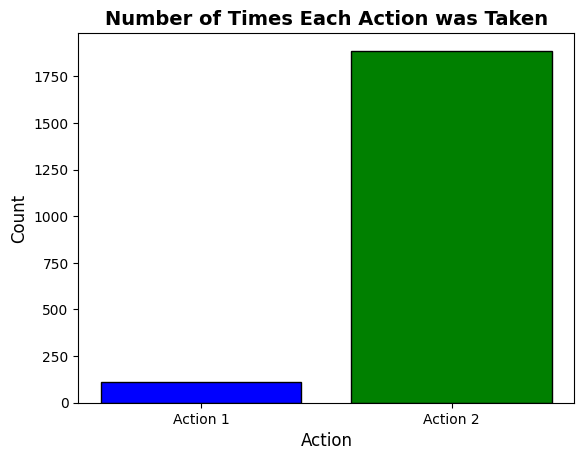


******************    RESULTS FOR BANDIT A    ******************
Observed Average Reward over 2000 experiments for Action 1: 0.1770
Observed Average Reward over 2000 experiments for Action 2: 0.5437
----------------------------------------------------------------
Actual Probability of Reward for Action 1: 0.2380
Actual Probability of Reward for Action 2: 0.5442
****************************************************************


In [5]:
random.seed(3)
myBanditA = BinaryBandit()


Q, R_avg, R = eGreedy_binary(myBanditA, 0.1, 2000)


print("\n******************    RESULTS FOR BANDIT A    ******************")


print(f"Observed Average Reward over 2000 experiments for Action 1: {Q[0]:.4f}")
print(f"Observed Average Reward over 2000 experiments for Action 2: {Q[1]:.4f}")

print("----------------------------------------------------------------")


print(f"Actual Probability of Reward for Action 1: {myBanditA.p[0]:.4f}")
print(f"Actual Probability of Reward for Action 2: {myBanditA.p[1]:.4f}")

print("****************************************************************")


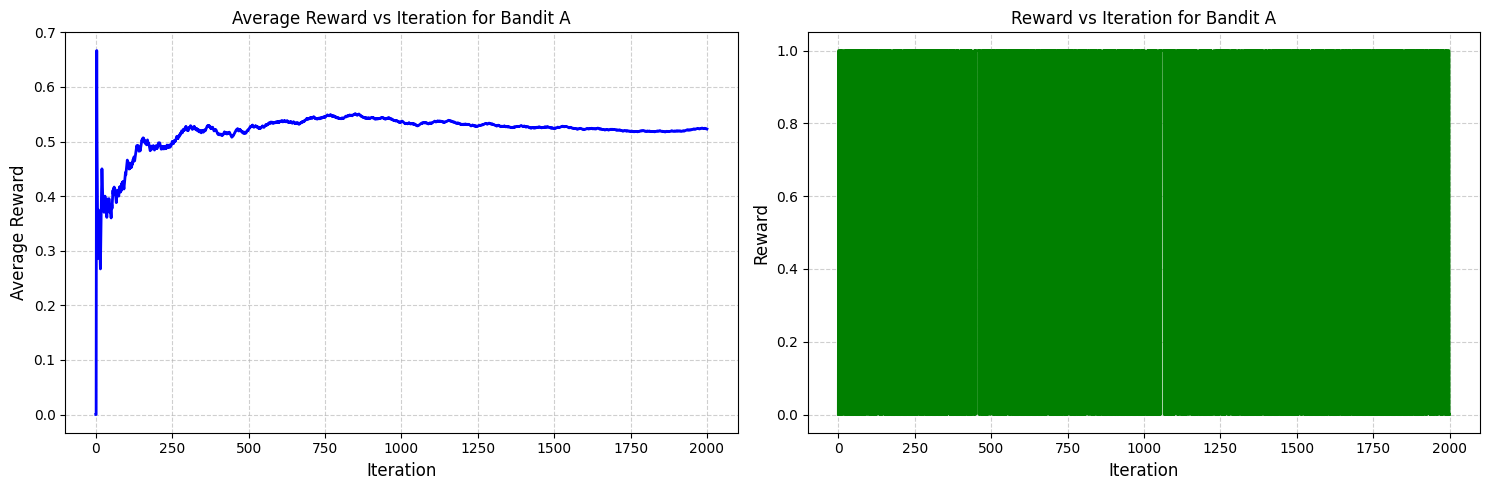

In [6]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))


ax1.plot(R_avg, color='blue', linestyle='-', linewidth=2)
ax1.title.set_text("Average Reward vs Iteration for Bandit A")
ax1.set_xlabel("Iteration", fontsize=12)
ax1.set_ylabel("Average Reward", fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6) 


ax2.plot(R, color='green', linestyle='-', linewidth=2)
ax2.title.set_text("Reward vs Iteration for Bandit A")
ax2.set_xlabel("Iteration", fontsize=12)
ax2.set_ylabel("Reward", fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.6)  


plt.tight_layout()


plt.show()



Final Counts for Action 1 (Arm 1): 1884
Final Counts for Action 2 (Arm 2): 116


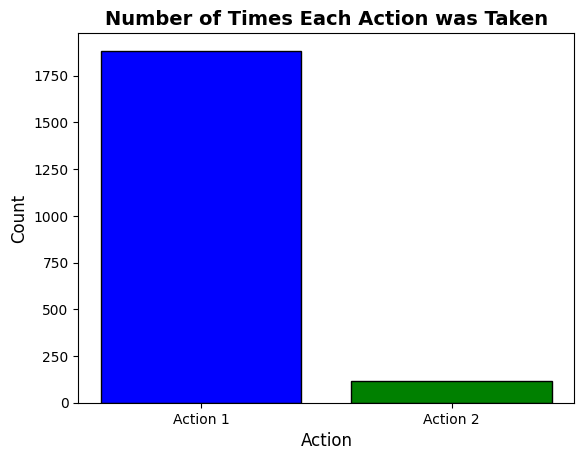


************************   RESULTS FOR BANDIT B   ******************************
Observed Average Reward over 2000 experiments for Action 1: 0.4889
Observed Average Reward over 2000 experiments for Action 2: 0.3362
----------------------------------------------------------------------------------
Actual Probability of Reward for Action 1: 0.4630
Actual Probability of Reward for Action 2: 0.3733
**********************************************************************************


In [7]:
random.seed(9)
myBanditB = BinaryBandit()


Q, R_avg, R = eGreedy_binary(myBanditB, 0.1, 2000)


print("\n************************   RESULTS FOR BANDIT B   ******************************")


print(f"Observed Average Reward over 2000 experiments for Action 1: {Q[0]:.4f}")
print(f"Observed Average Reward over 2000 experiments for Action 2: {Q[1]:.4f}")

print("----------------------------------------------------------------------------------")


print(f"Actual Probability of Reward for Action 1: {myBanditB.p[0]:.4f}")
print(f"Actual Probability of Reward for Action 2: {myBanditB.p[1]:.4f}")

print("**********************************************************************************")


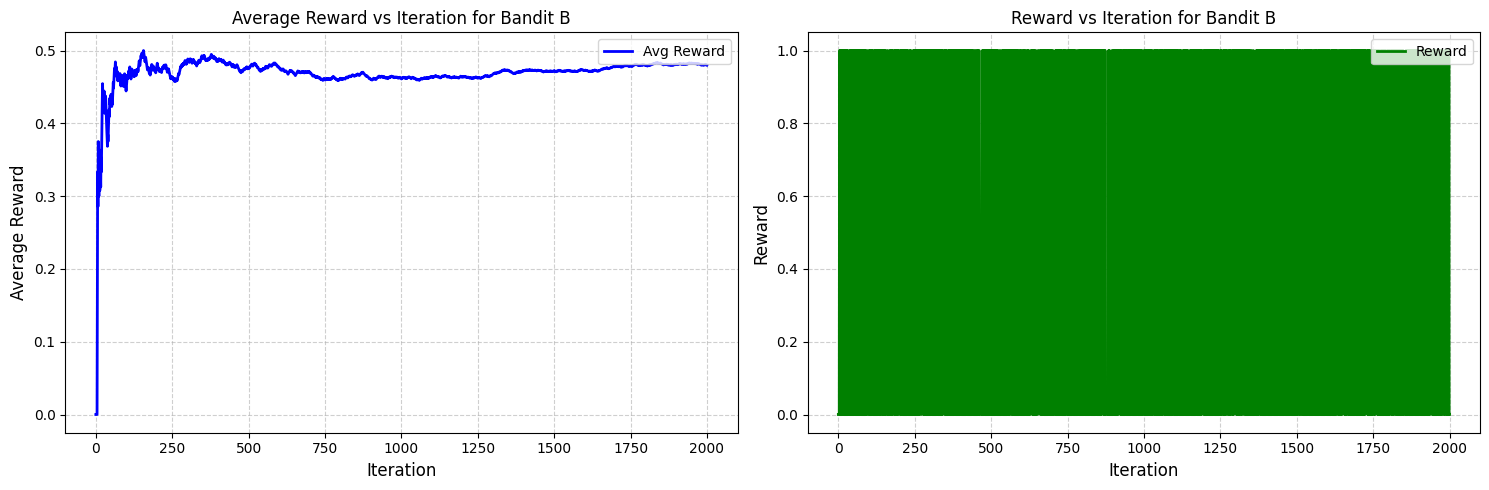

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot with blue color for average reward
ax1.plot(R_avg, color='blue', linestyle='-', linewidth=2, label="Avg Reward")
ax1.title.set_text("Average Reward vs Iteration for Bandit B")
ax1.set_xlabel("Iteration", fontsize=12)
ax1.set_ylabel("Average Reward", fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6) 
ax1.legend(loc="upper right")  

# Plot with green color for reward
ax2.plot(R, color='green', linestyle='-', linewidth=2, label="Reward")
ax2.title.set_text("Reward vs Iteration for Bandit B")
ax2.set_xlabel("Iteration", fontsize=12)
ax2.set_ylabel("Reward", fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.6) 
ax2.legend(loc="upper right") 

plt.tight_layout()

plt.show()

